[<__main__.DraggableRectangle object at 0x7f8540c0a2e8>, <__main__.DraggableRectangle object at 0x7f8540bbeb70>, <__main__.DraggableRectangle object at 0x7f8540bc60b8>, <__main__.DraggableRectangle object at 0x7f8540bc62e8>, <__main__.DraggableRectangle object at 0x7f8540bc6470>, <__main__.DraggableRectangle object at 0x7f8540bc65f8>, <__main__.DraggableRectangle object at 0x7f8540bc6780>, <__main__.DraggableRectangle object at 0x7f8540bc6908>, <__main__.DraggableRectangle object at 0x7f8540bc6a90>, <__main__.DraggableRectangle object at 0x7f8540bc6c18>]


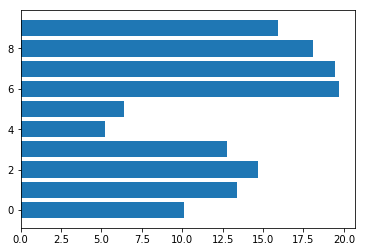

In [1]:
# draggable rectangle with the animation blit techniques; see
# http://www.scipy.org/Cookbook/Matplotlib/Animations
import numpy as np
import matplotlib.pyplot as plt


class DraggableRectangle:
    lock = None  # only one can be animated at a time

    def __init__(self, rect):
        self.rect = rect
        self.press = None
        self.background = None

        self.o_x = None
        self.o_y = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes:
            return
        if DraggableRectangle.lock is not None:
            return

        # save the original position for snapping back
        self.o_y = self.rect.get_y()
        self.o_x = self.rect.get_x()

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata
        DraggableRectangle.lock = self

        # draw everything but the selected rectangle and store the pixel buffer
        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        self.rect.set_animated(True)
        canvas.draw()
        self.background = canvas.copy_from_bbox(self.rect.axes.bbox)

        # now redraw just the rectangle
        axes.draw_artist(self.rect)

        # and blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if DraggableRectangle.lock is not self:
            return
        if event.inaxes != self.rect.axes:
            return

        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        # self.rect.set_x(x0 + dx)
        self.rect.set_y(y0 + dy)

        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        # restore the background region
        canvas.restore_region(self.background)

        # redraw just the current rectangle
        axes.draw_artist(self.rect)

        # blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_release(self, event):
        'on release we reset the press data'
        if DraggableRectangle.lock is not self:
            return

        # check if it is released past half of the above or below
        # get y of above and below
        if self.i == 0:
            y_below = None
        else:
            y_below = drs[self.i - 1].rect.get_y()

        if self.i == len(drs) - 1:
            y_above = None
        else:
            y_above = drs[self.i + 1].rect.get_y()

        # if the released rect is not above
        if y_above is None or y_below is None:
            self.rect.set_y(self.o_y)

        if self.rect.get_y() <= (y_above + self.rect.get_height() / 2):
            self.rect.set_y(self.o_y)
        elif self.rect.get_y() >= (y_below + self.rect.get_height() / 2):
            self.rect.set_y(self.o_y)

        self.press = None
        DraggableRectangle.lock = None

        # turn off the rect animation property and reset the background
        self.rect.set_animated(False)
        self.background = None

        # redraw the full figure
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)


fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.barh(range(10), 20 * np.random.rand(10))
# list of DraggableRectangle instances
drs = []

for i, rect in enumerate(rects):
    # create draggable rectangle from all created bars
    dr = DraggableRectangle(rect)
    dr.i = i
    dr.connect()
    drs.append(dr)  # add instance to list of all rectangles
print(drs)
plt.show()


In [4]:
rect.get_x()

0.0

In [5]:
rect.get_y()

8.6

In [9]:
rect.get_height()

0.8

In [12]:
a = drs[0]

In [14]:
a.rect.get_x()

0.0